In [1]:
import cv2

original = cv2.imread('images/1.jpg')
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

(thresh, bw) = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

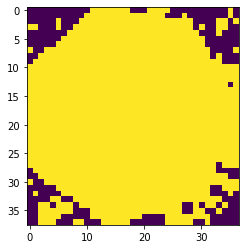

In [2]:
%matplotlib inline

from matplotlib import pyplot as plt

plt.imshow(bw)
plt.show()

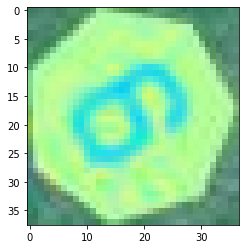

In [3]:
plt.imshow(original)

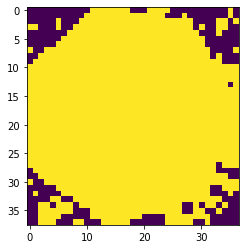

In [4]:
plt.imshow(bw)

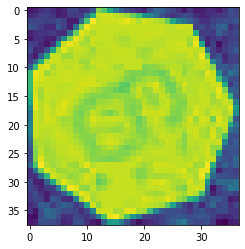

In [5]:
plt.imshow(gray)

In [6]:
from PIL import Image

img = Image.open("images/1.jpg")
gray = img.convert(mode = "1", dither = Image.NONE)

In [7]:
Image.show(gray)

AttributeError: module 'PIL.Image' has no attribute 'show'

In [ ]:
gray.show()

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

C:\Users\rohit\AppData\Local\Temp/ipykernel_5724/4238002758.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


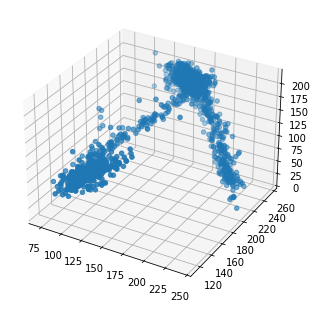

In [9]:
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

r, g, b = cv2.split(original)
r = r.flatten()
g = g.flatten()
b = b.flatten()

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [10]:
from sklearn.cluster import KMeans 

ori = original.reshape((original.shape[0] * original.shape[1], 3))
kmeans = KMeans(n_clusters = 3)
kmeans.fit(ori)

colors = kmeans.cluster_centers_

colors

array([[211.45108696, 228.72826087,  70.34782609],
       [155.02686203, 248.05738706, 173.45421245],
       [109.58312655, 144.5707196 ,  85.24813896]])

In [11]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.3, min_samples = 10)
clusters = dbscan.fit_predict(ori)

clusters

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [12]:
n = len(set(clusters)) - (1 if -1 in clusters else 0)

In [13]:
n

0

In [14]:
img = cv2.imread("images/1.jpg", cv2.IMREAD_COLOR)
img[0,0] = (0,0,0)

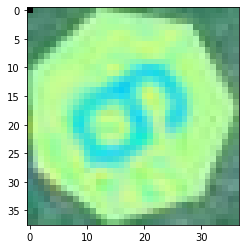

In [15]:
plt.imshow(img)

In [16]:
img[0,0]

array([0, 0, 0], dtype=uint8)

In [17]:
img[0,0] = (0,0,0)

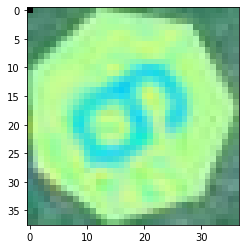

In [18]:
plt.imshow(img)

In [19]:
img[0,0] = (63, 121, 96)

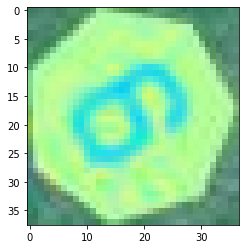

In [20]:
plt.imshow(img)

In [21]:
colors

array([[211.45108696, 228.72826087,  70.34782609],
       [155.02686203, 248.05738706, 173.45421245],
       [109.58312655, 144.5707196 ,  85.24813896]])

In [22]:
colors[0]

array([211.45108696, 228.72826087,  70.34782609])

In [23]:
c1 = colors[0]
c2 = colors[1]
c3 = colors[2]

In [26]:
np.around(c1)

array([211., 229.,  70.])

In [27]:
import numpy as np

In [28]:
np.around(c1)

array([211., 229.,  70.])

In [29]:
c1 = np.around(c1)
c2 = np.around(c2)
c3 = np.around(c3)

In [30]:
c3

array([110., 145.,  85.])

In [31]:
largest = 255**2 + 255**2 + 255*2

In [32]:
import math

In [33]:
largest = math.sqrt(largest)

In [34]:
largest

361.33087330035886

In [35]:
#the above is the largest euclidean distance we can have between two colors
#this is important for further calculations

#technique is to take the euclid distance between two rgb values (the pixel of the image itself)
#and the cluster center
#through that, we identify whether the given pixel is the letter/number's color

In [36]:
def ed(arr1, arr2):
    return np.linalg.norm(arr1-arr2)

In [37]:
dimensions = img.shape

In [38]:
h = img.shape[0]
w = img.shape[1]

In [39]:
h

38

In [40]:
w

37

In [41]:
kmeans.labels_

array([2, 2, 2, ..., 2, 2, 2])

In [42]:
len(kmeans.labels_)

1406

In [43]:
37*38

1406

In [44]:
labels = np.reshape(kmeans.labels_, (h, w))

In [45]:
labels

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

In [46]:
len(labels[0])

37

In [47]:
c2 #don;t want

array([155., 248., 173.])

In [48]:
c1 #color that we want to preserve

array([211., 229.,  70.])

In [49]:
c3 #don't want

array([110., 145.,  85.])

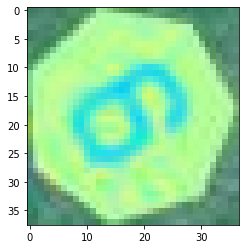

In [50]:
plt.imshow(img)

In [51]:
#new method
#replace euclidean distance with cluster centers

for i in range(h):
    for j in range(w):
        if labels[i][j] != 0:
            img[i,j] = (0,0,0)

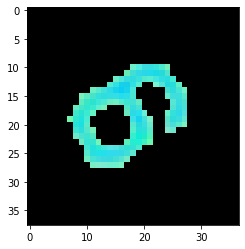

In [52]:
plt.imshow(img)

In [53]:
img = cv2.imread("images/1.jpg", cv2.IMREAD_COLOR)

In [54]:
for i in range(h):
    for j in range(w):
        if labels[i][j] != 0:
            img[i,j] = (0,0,0)

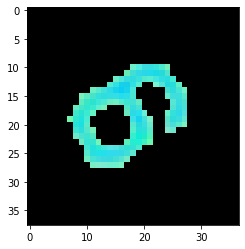

In [55]:
plt.imshow(img)

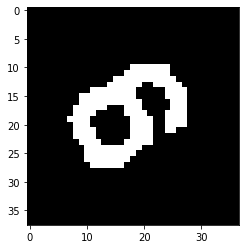

In [56]:
img = cv2.imread("images/1.jpg", cv2.IMREAD_COLOR)
for i in range(h):
    for j in range(w):
        if labels[i][j] == 0:
            img[i,j] = (255,255,255)
        else:
            img[i,j] = (0,0,0)
plt.imshow(img)

In [57]:
from tensorflow.keras.datasets import mnist

In [58]:
(trainX, trainY), (testX, testY) = mnist.load_data()

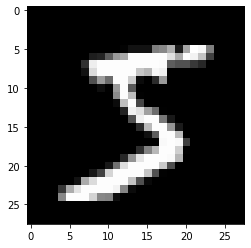

In [59]:
plt.imshow(trainX[0], cmap = plt.get_cmap('gray'))

In [60]:
trainX[0].shape

(28, 28)

In [61]:
img = cv2.resize(img, (28, 28))

In [62]:
plt.show(img)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

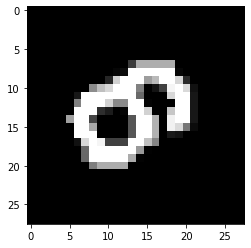

In [65]:
plt.imshow(img)

In [66]:
#train neural network in MNIST
#testing the above image (we can be sure numbers work then)

from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist

ImportError: cannot import name 'to_categorical' from 'keras.utils' (C:\Users\rohit\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\__init__.py)

In [67]:
from tensorflow.keras.utils import to_categorical #tensorflow.keras.utils over keras.utils

In [68]:
X_train[0]

NameError: name 'X_train' is not defined

In [69]:
trainX[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [70]:
plt.show(img)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

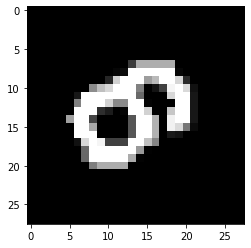

In [71]:
plt.imshow(img)

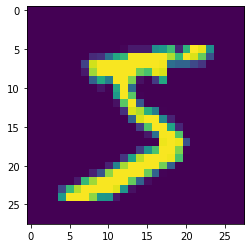

In [72]:
plt.imshow(trainX[0])

In [73]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [74]:
w

37

In [75]:
lum = [[0] * 37] * 38

In [76]:
lum

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [77]:
def find_luminance(rgb):
    return int(rgb[0] * 299/1000 + rgb[1] * 587/1000 + rgb[2] * 114/1000)

for i in range(28):
    for j in range(28):
        lum[i][j] = find_luminance(img[i][j])

In [78]:
print(lum[0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [79]:
print(lum[14])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [80]:
a = []
#testing
#observation: grayscaled rgb have r = g = b

for i in range(28):
    b = []
    for j in range(28):
        b.append(img[i][j][0])
    a.append(b)

a

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0

In [81]:
a

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0

In [82]:
for i in range(28):
    for j in range(28):
        print(avgIntensity[i][j])

NameError: name 'avgIntensity' is not defined

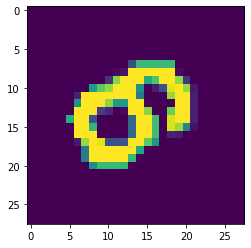

In [83]:
plt.imshow(a)

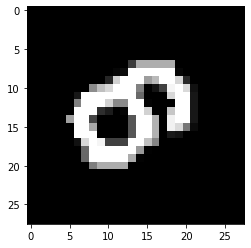

In [84]:
plt.imshow(a, cmap = 'gray')

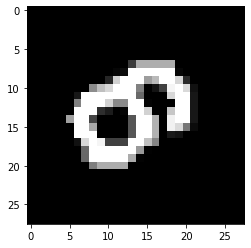

In [85]:
plt.imshow(img)

In [86]:
#neural network MNIST phase
trainX.shape

(60000, 28, 28)

In [87]:
testX.shape

(10000, 28, 28)

In [88]:
to_categorical(4, num_classes = 10) #Oe hot encoding

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [89]:
#encode all y's (train/test) like this

t = []
for i in range(trainY.shape[0]):
    t.append(to_categorical(trainY[i], num_classes = 10))
t

[array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0

In [90]:
trainY = t

In [91]:
t = []
for i in range(testY.shape[0]):
    t.append(to_categorical(testY[i], num_classes = 10))
t

[array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0

In [92]:
len(t)

10000

In [93]:
testY = t

In [94]:
testY = np.array(testY)
trainY = np.array(trainY)
print(trainY.shape)
print(testY.shape)

(60000, 10)
(10000, 10)


In [95]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(5, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 5)                 3925      
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [96]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [97]:
model.fit(trainX, trainY, epochs = 5, validation_data = (testX, testY))

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 1.6141 - acc: 0.5485 - val_loss: 1.2023 - val_acc: 0.6725
Epoch 2/5
1875/1875 [==============================] - 8s 5ms/step - loss: 1.0576 - acc: 0.6865 - val_loss: 0.9353 - val_acc: 0.6962
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9071 - acc: 0.7082 - val_loss: 0.8685 - val_acc: 0.6903
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8370 - acc: 0.7397 - val_loss: 0.7977 - val_acc: 0.7710
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7579 - acc: 0.7827 - val_loss: 0.7120 - val_acc: 0.7822


In [ ]:
predictions = model.predict(testX)

In [ ]:
predictions = np.argmax(predictions, axis = 1)
print(predictions)

In [98]:
from scipy.ndimage.interpolation import rotate
rotated = rotate(a, angle=61)

In [99]:
temp = [a]

In [100]:
temp

[[[0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,

In [101]:
np.argmax(model.predict(temp), axis = 1)

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {'(<class \'list\'> containing values of types {\'(<class \\\'list\\\'> containing values of types {"<class \\\'numpy.uint8\\\'>"})\'})'}), <class 'NoneType'>

In [102]:
predict_t = model.predict(temp)

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {'(<class \'list\'> containing values of types {\'(<class \\\'list\\\'> containing values of types {"<class \\\'numpy.uint8\\\'>"})\'})'}), <class 'NoneType'>

In [103]:
a = np.array(a)

In [104]:
a

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [105]:
temp = [a]

In [106]:
temp

[array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0

In [107]:
temp = np.array(temp)

In [108]:
testX

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [109]:
temp

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0

In [110]:
predict_t = model.predict(temp)

In [111]:
predict_t = np.argmax(predict_t, axis = 1)

In [112]:
predict_t

array([4], dtype=int64)

In [113]:
a

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

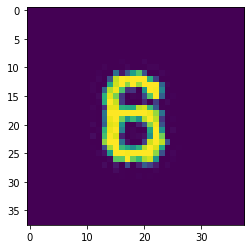

In [118]:
plt.imshow(rotated)

In [115]:
predict_t = model.predict(temp)

In [116]:
predict_t

array([[2.6912712e-03, 4.5389569e-04, 1.0309409e-02, 3.6705926e-04,
        6.7942798e-01, 1.4545067e-03, 5.7205632e-02, 3.2438017e-02,
        7.4419467e-04, 2.1490803e-01]], dtype=float32)

In [119]:
rotated

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [120]:
temp = [rotated]
temp = np.array(temp)

In [121]:
predict_t = model.predict(temp)

ValueError: in user code:

    File "C:\Users\rohit\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\rohit\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\rohit\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\rohit\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1572, in predict_step
        return self(x, training=False)
    File "C:\Users\rohit\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\rohit\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 28, 28), found shape=(None, 38, 38)


In [122]:
predict_t

array([[2.6912712e-03, 4.5389569e-04, 1.0309409e-02, 3.6705926e-04,
        6.7942798e-01, 1.4545067e-03, 5.7205632e-02, 3.2438017e-02,
        7.4419467e-04, 2.1490803e-01]], dtype=float32)

In [123]:
temp

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [124]:
rotated

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [125]:
rotated[0].size

38

In [126]:
a


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [127]:
a[0].size

28

In [128]:
rotated = rotate(a, angle = 61)

In [129]:
rotated

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [130]:
rotated[0].size

38

In [131]:
a.shape

(28, 28)

In [132]:
rotated.shape

(38, 38)

In [133]:
vis = cv.fromarray(rotated)

NameError: name 'cv' is not defined

In [134]:
import cv2

In [135]:
vis = cv2.fromarray(rotated)

AttributeError: module 'cv2.cv2' has no attribute 'fromarray'

In [136]:
import cv

In [137]:
vis = cv.fromarray(rotated)

AttributeError: module 'cv' has no attribute 'fromarray'

In [138]:
slice = rotated[4:31, 4:31] #-_- oh boy

In [139]:
slice

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,
          0,   0,   0,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   

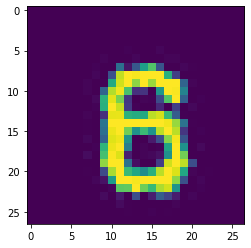

In [140]:
plt.imshow(slice)

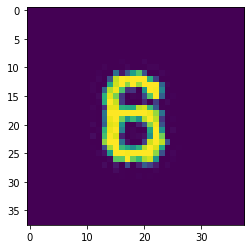

In [141]:
plt.imshow(rotated)

In [148]:
slice = rotated[5:33, 5:33]

(28, 28)

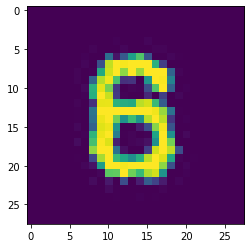

In [149]:
plt.imshow(slice)
slice.shape

In [150]:
temp = [slice]

In [151]:
temp = np.array(temp)

In [152]:
model.predict(temp)

array([[1.10800285e-02, 8.00442591e-04, 1.42354425e-02, 7.29442015e-03,
        2.29871087e-02, 7.00182319e-02, 7.00267017e-01, 1.09756787e-04,
        1.36043906e-01, 3.71635109e-02]], dtype=float32)

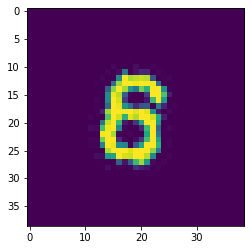

In [155]:
rotated = rotate(a, 50)
plt.imshow(rotated)

In [156]:
slice = rotated[5:33, 5:33]

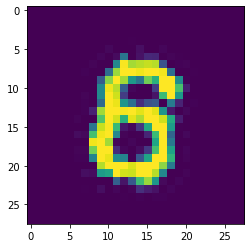

In [157]:
plt.imshow(slice)

In [158]:
model.predict(temp)

array([[1.10800285e-02, 8.00442591e-04, 1.42354425e-02, 7.29442015e-03,
        2.29871087e-02, 7.00182319e-02, 7.00267017e-01, 1.09756787e-04,
        1.36043906e-01, 3.71635109e-02]], dtype=float32)